In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from sklearn.preprocessing import StandardScaler

import keras 
from keras.models import Sequential # intitialize the ANN
from keras.layers import Dense, Activation, Dropout      # create layers

np.random.seed(42)
tf.random.set_seed(42)
# show all columns when displaying a data frame
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
dtypes = {'country':'category', 'cat_name':'category', 'cat_slug':'category', 'loc_name':'category', 
'loc_country':'category', 'loc_state':'category', 'loc_type':'category', 'main_category':'category', 
'sub_category':'category', 'goal_categorical':'category', 'currency':'category', 'usd_type':'category'}
frame_all = pd.read_csv('data/Kickstarter_full.csv', index_col=0, parse_dates=['created_at', 'launched_at', 'deadline', 'state_changed_at'], dtype=dtypes)

In [3]:
columns = frame_all.columns

In [4]:
to_delete = ['backers_count',
 'blurb',
 'created_at',
 'converted_pledged_amount',
 'currency_symbol',
 'currency_trailing_code',
 'current_currency',
 'deadline',
 'goal',
 'id',
 'is_starrable',
 'launched_at',
 'name',
 'pledged',
 'slug',
 'source_url',
 'spotlight',
 'staff_pick',
 'state',
 'state_changed_at',
 'usd_pledged',
 'cat_name',
 'cat_slug',
 'loc_name',
 'loc_country',
 'loc_state',
 'photo_thumb',
 'photo_large',
 'project_address',
 'profile_photo',
 'creator_name',
 'creator_id',
 'creator_thumb',
 'creator_address',
 'goal_surpass',
 'goal_surpass_share',
 'goal_surpass_usd',
 'baseline',
 'disable_communication']

In [5]:
frame_all.drop(columns=to_delete, inplace=True)

In [6]:
# Save category-column-names in list
categorical_cols = frame_all.select_dtypes(include='category').columns

# save numerical features in a list
num_features = frame_all.select_dtypes(include='number').columns.to_list()
num_features.remove('state_bool')

#import pandas as pd
frame_all = pd.get_dummies(frame_all, columns = categorical_cols, drop_first=True)

In [7]:
X = frame_all.drop('state_bool', axis=1)
y = frame_all.state_bool

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [9]:
# scale the (few) numerical features
std = StandardScaler()
X_train_scaled = X_train.copy(deep=True)
X_test_scaled = X_test.copy(deep=True)
X_train_scaled[num_features] = std.fit_transform(X_train_scaled[num_features])
X_test_scaled[num_features] = std.transform(X_test_scaled[num_features])

In [10]:
X_train.shape

(126507, 221)

In [24]:
# Initialising the NN
model = Sequential()

# layers
model.add(Dense(units = 128, kernel_initializer = 'normal', activation = 'relu', input_dim = 221))
model.add(Dropout(0.2))
model.add(Dense(units = 128, kernel_initializer = 'normal', activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 128, kernel_initializer = 'normal', activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1, kernel_initializer = 'normal', activation = 'sigmoid'))

# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               28416     
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 128)               16512     
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 128)               16512     
                                                                 
 dropout_8 (Dropout)         (None, 128)               0         
                                                                 
 dense_11 (Dense)            (None, 1)                

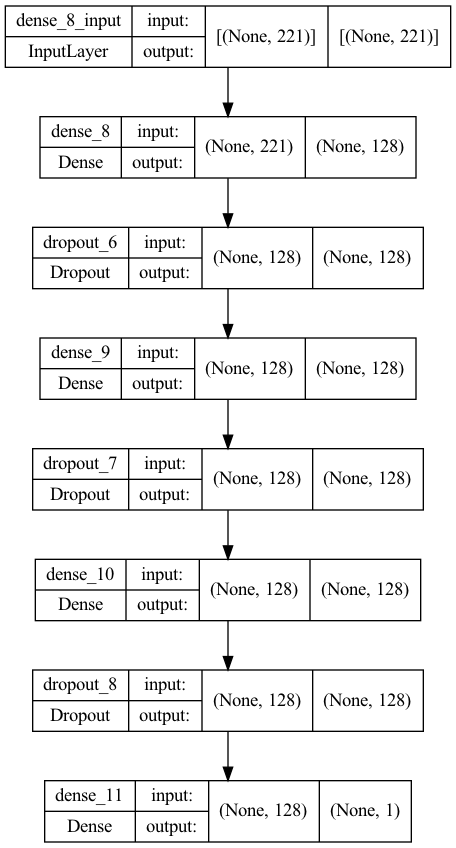

In [25]:
plot_model(
    model, to_file='model.png', show_shapes=True, 
    show_layer_names=True, dpi=96
)

In [26]:
# Train the ANN
training = model.fit(X_train_scaled, y_train, batch_size = 128, validation_split=0.2, epochs = 50)

Epoch 1/50
  1/791 [..............................] - ETA: 5:46 - loss: 0.6925 - accuracy: 0.5078

2022-04-07 14:29:37.639158: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


791/791 [==============================] - ETA: 0s - loss: 0.4737 - accuracy: 0.7507

2022-04-07 14:29:53.420077: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


791/791 [==============================] - 17s 21ms/step - loss: 0.4737 - accuracy: 0.7507 - val_loss: 0.4269 - val_accuracy: 0.7808
Epoch 2/50
791/791 [==============================] - 8s 10ms/step - loss: 0.4245 - accuracy: 0.7808 - val_loss: 0.4137 - val_accuracy: 0.7884
Epoch 3/50
791/791 [==============================] - 8s 10ms/step - loss: 0.4143 - accuracy: 0.7859 - val_loss: 0.4089 - val_accuracy: 0.7931
Epoch 4/50
791/791 [==============================] - 8s 10ms/step - loss: 0.4078 - accuracy: 0.7890 - val_loss: 0.4033 - val_accuracy: 0.7914
Epoch 5/50
791/791 [==============================] - 8s 10ms/step - loss: 0.4030 - accuracy: 0.7924 - val_loss: 0.4031 - val_accuracy: 0.7944
Epoch 6/50
791/791 [==============================] - 8s 11ms/step - loss: 0.3991 - accuracy: 0.7952 - val_loss: 0.4057 - val_accuracy: 0.7903
Epoch 7/50
791/791 [==============================] - 8s 10ms/step - loss: 0.3971 - accuracy: 0.7969 - val_loss: 0.4008 - val_accuracy: 0.7925
Epoch 8/5

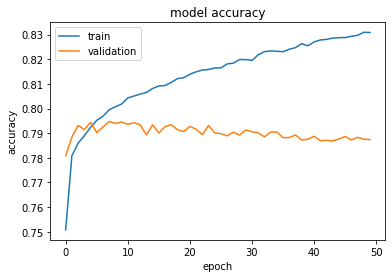

In [28]:
# summarize history for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [29]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.title('Model Loss')
    plt.ylim([0, 0.5])
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)

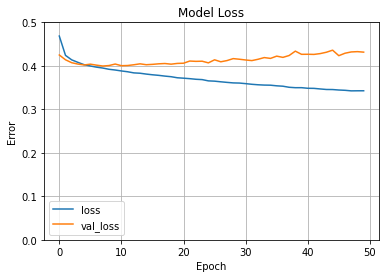

In [20]:
plot_loss(history=training)

In [30]:
# Evaluate the model on test set using .evaluate
loss, acc = model.evaluate(X_test_scaled, y_test, verbose=2)
print(f'Model Accuracy: {acc}')
print(f'Model Loss: {loss}')


1318/1318 - 5s - loss: 0.4290 - accuracy: 0.7858 - 5s/epoch - 3ms/step
Model Accuracy: 0.785771906375885
Model Loss: 0.4290493130683899


In [22]:
frame_all.groupby('state_bool').count()

,fx_rate,static_usd_rate,dur_inactive,dur_until_state_changed,dur_active,dur_ratio,goal_usd,blurb_words,blurb_len,name_len,name_words,country_AU,country_BE,country_CA,country_CH,country_DE,country_DK,country_ES,country_FR,country_GB,country_HK,country_IE,country_IT,country_JP,country_LU,country_MX,country_NL,country_NO,country_NZ,country_SE,country_SG,country_US,currency_CAD,currency_CHF,currency_DKK,currency_EUR,currency_GBP,currency_HKD,currency_JPY,currency_MXN,currency_NOK,currency_NZD,currency_SEK,currency_SGD,currency_USD,usd_type_international,loc_type_Estate,loc_type_Island,loc_type_LocalAdmin,loc_type_Miscellaneous,loc_type_Suburb,loc_type_Town,loc_type_Zip,main_category_comics,main_category_crafts,main_category_dance,main_category_design,main_category_fashion,main_category_film & video,main_category_food,main_category_games,main_category_journalism,main_category_music,main_category_photography,main_category_publishing,main_category_technology,main_category_theater,sub_category_3d printing,sub_category_academic,sub_category_accessories,sub_category_action,sub_category_animals,sub_category_animation,sub_category_anthologies,sub_category_apparel,sub_category_apps,sub_category_architecture,sub_category_art books,sub_category_audio,sub_category_bacon,sub_category_blues,sub_category_calendars,sub_category_camera equipment,sub_category_candles,sub_category_ceramics,sub_category_children's books,sub_category_childrenswear,sub_category_chiptune,sub_category_civic design,sub_category_classical music,sub_category_comedy,sub_category_comic books,sub_category_community gardens,sub_category_conceptual art,sub_category_cookbooks,sub_category_country & folk,sub_category_couture,sub_category_crochet,sub_category_digital art,sub_category_diy,sub_category_diy electronics,sub_category_documentary,sub_category_drama,sub_category_drinks,sub_category_electronic music,sub_category_embroidery,sub_category_events,sub_category_experimental,sub_category_fabrication tools,sub_category_faith,sub_category_family,sub_category_fantasy,sub_category_farmer's markets,sub_category_farms,sub_category_festivals,sub_category_fiction,sub_category_fine art,sub_category_flight,sub_category_food trucks,sub_category_footwear,sub_category_gadgets,sub_category_gaming hardware,sub_category_glass,sub_category_graphic design,sub_category_graphic novels,sub_category_hardware,sub_category_hip-hop,sub_category_horror,sub_category_illustration,sub_category_immersive,sub_category_indie rock,sub_category_installations,sub_category_interactive design,sub_category_jazz,sub_category_jewelry,sub_category_kids,sub_category_knitting,sub_category_latin,sub_category_letterpress,sub_category_literary journals,sub_category_literary spaces,sub_category_live games,sub_category_makerspaces,sub_category_metal,sub_category_mixed media,sub_category_mobile games,sub_category_movie theaters,sub_category_music videos,sub_category_musical,sub_category_narrative film,sub_category_nature,sub_category_nonfiction,sub_category_painting,sub_category_people,sub_category_performance art,sub_category_performances,sub_category_periodicals,sub_category_pet fashion,sub_category_photo,sub_category_photobooks,sub_category_places,sub_category_playing cards,sub_category_plays,sub_category_poetry,sub_category_pop,sub_category_pottery,sub_category_print,sub_category_printing,sub_category_product design,sub_category_public art,sub_category_punk,sub_category_puzzles,sub_category_quilts,sub_category_r&b,sub_category_radio & podcasts,sub_category_ready-to-wear,sub_category_residencies,sub_category_restaurants,sub_category_robots,sub_category_rock,sub_category_romance,sub_category_science fiction,sub_category_sculpture,sub_category_shorts,sub_category_small batch,sub_category_software,sub_category_sound,sub_category_space exploration,sub_category_spaces,sub_category_stationery,sub_category_tabletop games,sub_category_taxidermy,sub_category_television,sub_category_textiles,sub_category_thrillers,sub_category_transl

In [27]:
X_train.shape

(126507, 221)